# Medical Image Analysis using CNN
#### Divina Komal Dcunha | 2021NOVVUGP0016

**Datset Reference:** 

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

**Notebook Reference:**

https://www.kaggle.com/code/ahmedmahmoud16/medical-image-analysis-with-cnn

**Context:** 

The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.

**Content:** 

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

**Objective:**

Develop automated methods to detect and classify human diseases from medical images.




In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Data Preprocessing

In [3]:
def loading_preprocessing(path):
    # Initialize an empty list to store processed images
    img_list = []
    
    # Iterate through each file in the specified directory
    for img_path in os.listdir(path):
        # Construct the full path to the image file
        img = cv2.imread(path + '/' + img_path)
        
        # Check if the image was successfully loaded
        if img is None:
            print(f"Warning: Unable to load image at {path}/{img_path}")
            continue
        
        # Convert the image from BGR to RGB color space
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Resize the image to 255x255 pixels
        img = cv2.resize(img, (255, 255))
        
        # Normalize pixel values to the range [0, 1]
        img = img / 255.0
        
        # Append the processed image to the list
        img_list.append(img)
    
    # Return the list of processed images
    return img_list


In [4]:
# Load normal chest X-ray images
train_class1 = loading_preprocessing('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL')

# Load pneumonia chest X-ray images
train_class2 = loading_preprocessing('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')


In [5]:
# Create labels for the training dataset
# 0 for normal images and 1 for pneumonia images
# labels are created by multiplying the count of each class by its corresponding label.

train_labels = [0] * len(train_class1) + [1] * len(train_class2)


In [6]:
# Combine the lists of images from both classes into a single training dataset
train_list = train_class1 + train_class2


In [7]:
print("length of train data")
print("length of data is ",len(train_list))
print("length of labels is ",len(train_labels))

length of train data
length of data is  5216
length of labels is  5216


In [8]:
# Load normal chest X-ray images for testing
test_class1 = loading_preprocessing('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL')

# Load pneumonia chest X-ray images for testing
test_class2 = loading_preprocessing('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA')


In [9]:
# Create labels for the test dataset
# 0 for normal images and 1 for pneumonia images
# Explains that the labels are created by multiplying the count of each class by its respective label.

test_labels = [0] * len(test_class1) + [1] * len(test_class2)



In [10]:
# Combine the lists of test images from both classes into a single test dataset
test_list = test_class1 + test_class2

In [11]:
print("length of test data")
print("length of data is ",len(test_list))
print("length of labels is ",len(test_labels))

length of test data
length of data is  624
length of labels is  624


### For Train Images

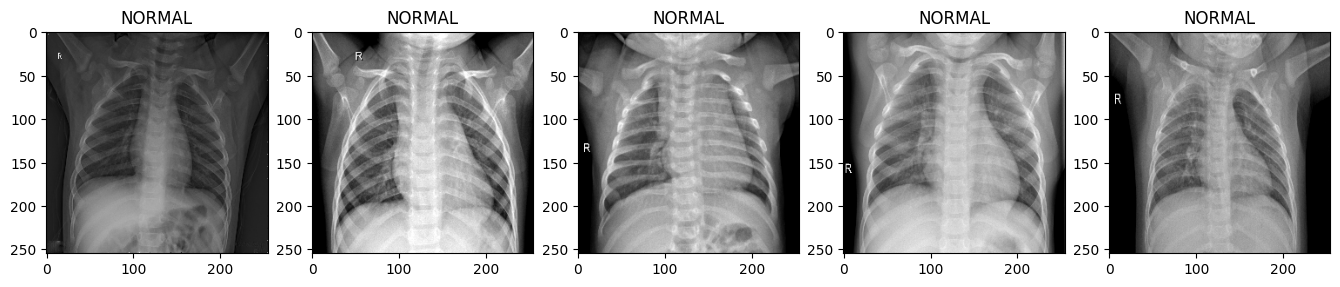

In [12]:
# Set the figure size for the plot
plt.figure(figsize=(20, 20))

# Loop through the first 5 images and their corresponding labels
for i, (img, label) in enumerate(zip(train_list[:5], train_labels[:5])):
    # Create a subplot for each image
    plt.subplot(5, 6, i + 1)
    
    # Display the image
    plt.imshow(img)
    
    # Determine the title based on the label
    if label == 0:
        title = "NORMAL"
    elif label == 1:
        title = "PNEUMONIA"
    
    # Set the title for the subplot
    plt.title(title)

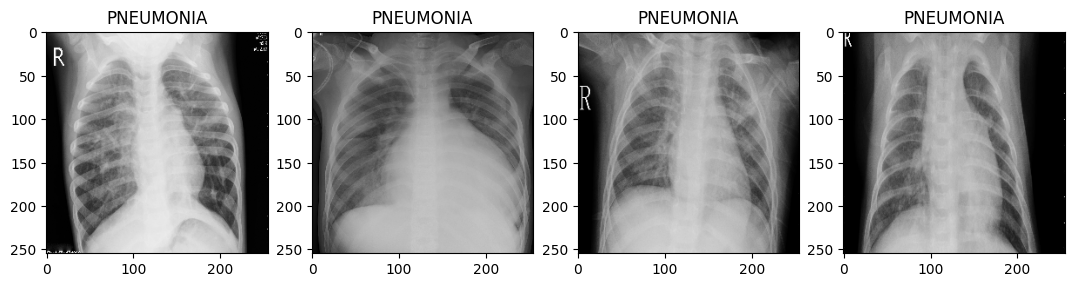

In [13]:
# Set the figure size for the plot
plt.figure(figsize=(20, 20))

# Loop through the last 5 images and their corresponding labels
for i, (img, label) in enumerate(zip(train_list[-5:-1], train_labels[-5:-1])):
    # Create a subplot for each image
    plt.subplot(5, 6, i + 1)
    
    # Display the image
    plt.imshow(img)
    
    # Determine the title based on the label
    if label == 0:
        title = "NORMAL"
    elif label == 1:
        title = "PNEUMONIA"
    
    # Set the title for the subplot
    plt.title(title)

### For Test Images

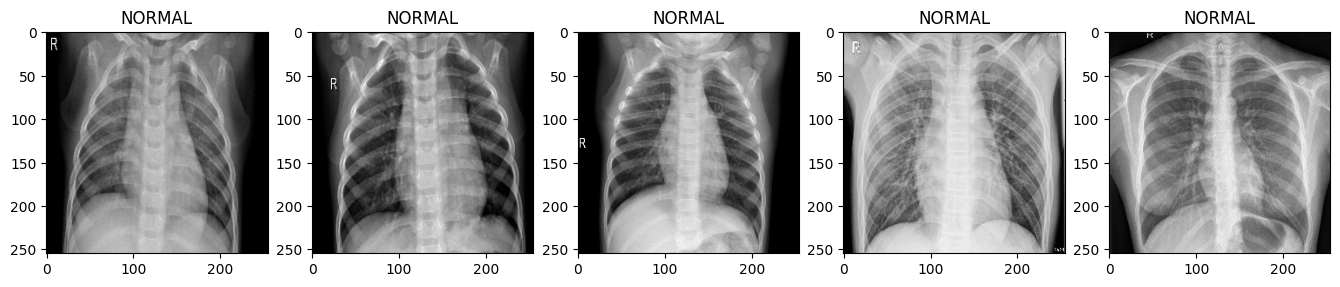

In [14]:
# Set the figure size for the plot
plt.figure(figsize=(20, 20))

# Loop through the first 5 test images and their corresponding labels
for i, (img, label) in enumerate(zip(test_list[:5], test_labels[:5])):
    # Create a subplot for each image
    plt.subplot(5, 6, i + 1)
    
    # Display the image
    plt.imshow(img)
    
    # Determine the title based on the label
    if label == 0:
        title = "NORMAL"
    elif label == 1:
        title = "PNEUMONIA"
    
    # Set the title for the subplot
    plt.title(title)

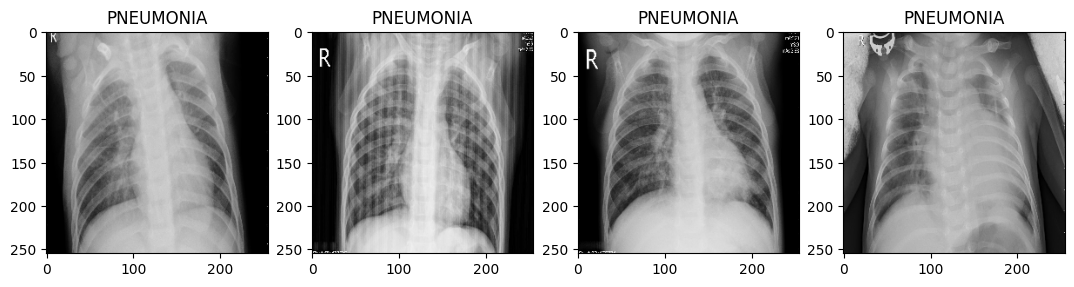

In [15]:
# Set the figure size for the plot
plt.figure(figsize=(20, 20))

# Loop through the last 5 test images and their corresponding labels
for i, (img, label) in enumerate(zip(test_list[-5:-1], test_labels[-5:-1])):
    # Create a subplot for each image
    plt.subplot(5, 6, i + 1)
    
    # Display the image
    plt.imshow(img)
    
    # Determine the title based on the label
    if label == 0:
        title = "NORMAL"
    elif label == 1:
        title = "PNEUMONIA"
    
    # Set the title for the subplot
    plt.title(title)

In [21]:
# Convert the list of training images into a NumPy array
X_train = np.array(train_list)

# Convert the list of test images into a NumPy array
X_test = np.array(test_list)


In [16]:
# Import TensorFlow library
import tensorflow as tf

# Import models, layers, and utils from Keras
from tensorflow.keras import models, layers, utils

In [17]:
# Each label is represented as a binary vector. 
# For two classes (0 and 1), this results in two columns.

# Convert training labels to one-hot encoded format
y_train = utils.to_categorical(train_labels, num_classes=2)

# Convert test labels to one-hot encoded format
y_test = utils.to_categorical(test_labels, num_classes=2)


In [18]:
#Confirming number of classes is 2 for y_train

y_train.shape

(5216, 2)

In [19]:
#Confirming number of classes is 2 for y_train

y_test.shape

(624, 2)

# Model Building (CNN)

In [22]:
# Initialize a sequential model
model = models.Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, kernel_size=(3, 3), padding='same', strides=1, activation='relu', input_shape=(X_train[0].shape)))

# Add a max pooling layer to down-sample the feature maps
model.add(layers.MaxPool2D((2, 2)))

# Add another convolutional layer with 16 filters
model.add(layers.Conv2D(16, kernel_size=(3, 3), padding='same', strides=1, activation='relu'))

# Add another max pooling layer
model.add(layers.MaxPool2D((2, 2)))

# Flatten the output from the previous layer to feed into dense layers
model.add(layers.Flatten())

# Add a dense layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add another dense layer with 16 units and ReLU activation
model.add(layers.Dense(16, activation='relu'))

# Add the output layer with 2 units (for two classes) and softmax activation
model.add(layers.Dense(2, activation='softmax'))

# Display the model's architecture
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 63504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,064,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,070,914 (15.53 MB)

 Trainable params: 4,070,914 (15.53 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy as a metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model on the training data for 10 epochs, using the test data for validation
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.8241 - loss: 0.3799 - val_accuracy: 0.8301 - val_loss: 0.4561
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.9637 - loss: 0.0991 - val_accuracy: 0.6859 - val_loss: 1.3972
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.9738 - loss: 0.0671 - val_accuracy: 0.7115 - val_loss: 1.1409
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9823 - loss: 0.0439 - val_accuracy: 0.7212 - val_loss: 1.6527
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9930 - loss: 0.0241 - val_accuracy: 0.6891 - val_loss: 2.0946
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9878 - loss: 0.0336 - val_accuracy: 0.7436 - val_loss: 1.4259
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9977 - loss: 0.0132 - val_accuracy: 0.7196 - val_loss: 1.8732
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9916 - loss: 0.0234 - val_accu

In [25]:
# Generate predictions for the test dataset
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels by taking the argmax
y_pred = np.argmax(np.round(y_pred), axis=1)

# Display the predicted class labels
y_pred

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 341ms/step


array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Model Evaluation and Experimentation

In [26]:
# Import necessary metrics for model evaluation from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Import Seaborn for enhanced visualization
import seaborn as sns

In [27]:
# Calculate accuracy of the model's predictions
accuracy = accuracy_score(test_labels, y_pred)

# Calculate precision of the model's predictions
precision = precision_score(test_labels, y_pred)

# Calculate recall of the model's predictions
recall = recall_score(test_labels, y_pred)

# Calculate F1 score of the model's predictions
f1 = f1_score(test_labels, y_pred)

In [28]:
# Print the accuracy of the model, formatted to two decimal places
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


In [29]:
# Print the precision of the model, formatted to two decimal places
print(f'Precision: {precision:.2f}')

Precision: 0.82


In [30]:
# Print the recall of the model, formatted to two decimal places
print(f'Recall: {recall:.2f}')

Recall: 0.95


In [31]:
# Print the F1 score of the model, formatted to two decimal places
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.88


In [33]:
# Generate the confusion matrix to compare true labels and predicted labels
cm = confusion_matrix(test_labels, y_pred)

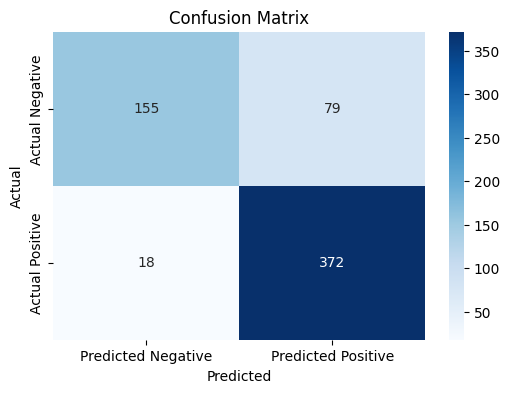

In [34]:
# Set the figure size for the confusion matrix plot
plt.figure(figsize=(6, 4))

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Label the x-axis
plt.xlabel('Predicted')

# Label the y-axis
plt.ylabel('Actual')

# Set the title for the plot
plt.title('Confusion Matrix')

# Display the plot
plt.show()

### Confusion Matrix Values

* True Negatives (TN): 155 (correctly identified as normal)
* False Positives (FP): 79 (incorrectly identified as pneumonia)
* False Negatives (FN): 18 (incorrectly identified as normal)
* True Positives (TP): 372 (correctly identified as pneumonia)


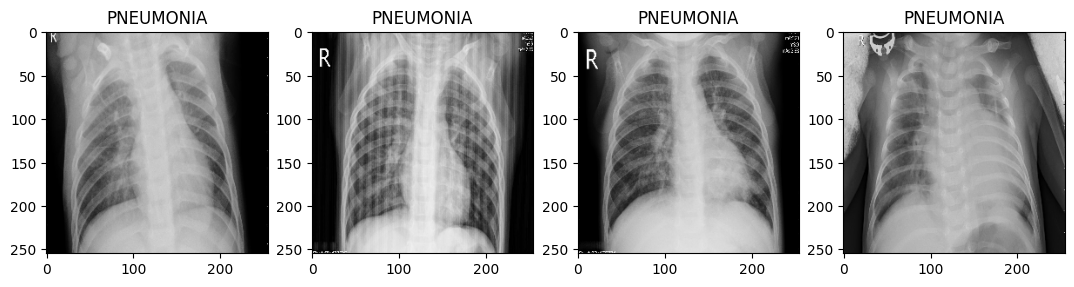

In [35]:
# Set the figure size for displaying the images
plt.figure(figsize=(20, 20))

# Loop through the last few images and their predicted labels
for i, (img, label) in enumerate(zip(test_list[-5:-1], y_pred[-5:-1])):
    # Create a subplot for each image
    plt.subplot(5, 6, i + 1)
    plt.imshow(img)  # Display the image

    # Set the title based on the predicted label
    if label == 0:
        title = "NORMAL"
    elif label == 1:
        title = "PNEUMONIA"
    plt.title(title)  # Display the title
    
    
#for i, (img, label) in enumerate(zip(test_list[-5:], y_pred[-5:])):

In [37]:
# Save the trained CNN model to a file named 'CNN_model.h5'
model.save('CNN_model.h5')